# Function Y = 3X+2

In [1]:
#generating datapoints

import numpy as np

x_data = np.random.rand(100).astype(np.float32)
y_data = x_data*3 + 2

#gaussian noise
y_data = np.vectorize(lambda y: y + np.random.normal(loc=0.0, scale=0.2))(y_data)

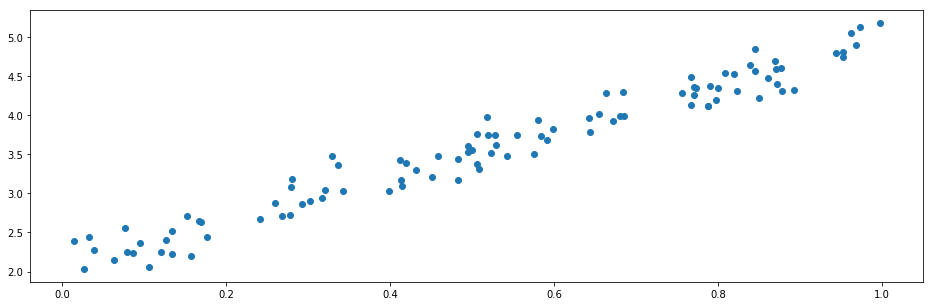

In [2]:
#plotting these points

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 5)

plt.scatter(x_data, y_data)
plt.show()

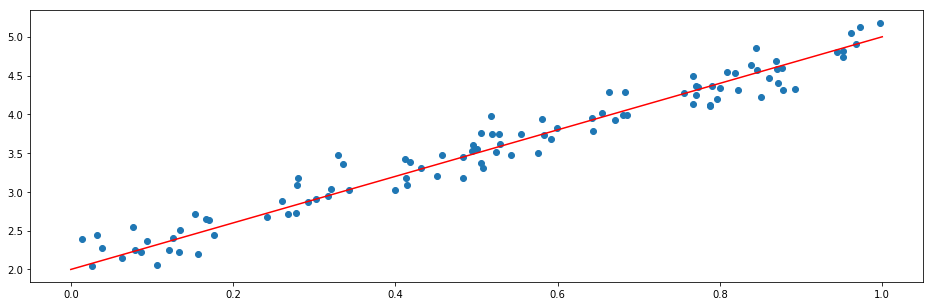

In [3]:
#expected line

#m=3 b=2

plt.scatter(x_data, y_data)
plt.plot([2,5], c='r')
plt.show()

In [4]:
#machine learning madness begins

import tensorflow as tf

/home/kautuk/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [17]:
m = tf.Variable(0.)
b = tf.Variable(0.)

y = m*x_data + b

loss = tf.reduce_mean(tf.square(y-y_data))

optimizer = tf.train.GradientDescentOptimizer(0.001)
train = optimizer.minimize(loss)

with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    
    train_data = []
    
    #epochs
    for steps in range(80000):
        evals = sess.run([train,m,b])[1:]
        if steps % 2500 == 0:
            print('steps {} of 50000 complete, current value {}' .format(steps, evals))
            train_data.append(evals)

steps 0 of 50000 complete, current value [0.0042198375, 0.007177665]
steps 2500 of 50000 complete, current value [1.9143101, 2.613172]
steps 5000 of 50000 complete, current value [2.1713538, 2.475305]
steps 7500 of 50000 complete, current value [2.358388, 2.3708634]
steps 10000 of 50000 complete, current value [2.4957678, 2.2941434]
steps 12500 of 50000 complete, current value [2.5966797, 2.237789]
steps 15000 of 50000 complete, current value [2.6708, 2.1963954]
steps 17500 of 50000 complete, current value [2.725243, 2.1659887]
steps 20000 of 50000 complete, current value [2.765232, 2.1436634]
steps 22500 of 50000 complete, current value [2.7946005, 2.1272542]
steps 25000 of 50000 complete, current value [2.8161688, 2.115218]
steps 27500 of 50000 complete, current value [2.8320055, 2.1063735]
steps 30000 of 50000 complete, current value [2.843631, 2.0998905]
steps 32500 of 50000 complete, current value [2.8521528, 2.0951297]
steps 35000 of 50000 complete, current value [2.8584094, 2.09

In [6]:
# final values after training

train_data[-1]

[2.8747842, 2.0824976]

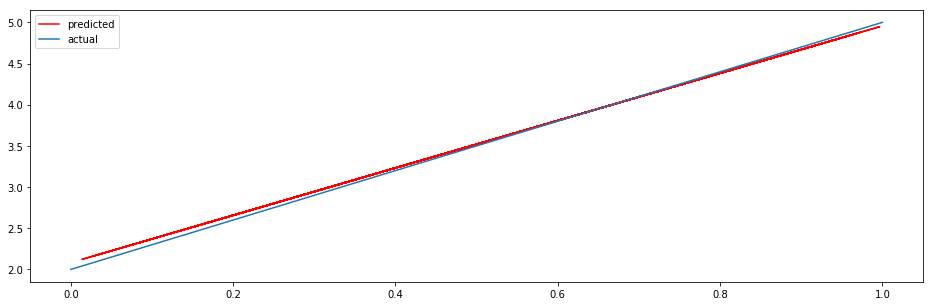

In [7]:
plt.plot(x_data, train_data[-1][0]*x_data + train_data[-1][1], 'r', label='predicted')
plt.plot([2,5], label='actual')
plt.legend()
plt.show()